In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
data_path = "../../../data/train/"
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
title_df = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep="\t")
years_df = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep="\t")
genres_df = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep="\t")
directors_df = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep="\t")
writers_df = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep="\t")

In [4]:
directors_df[directors_df['item'] == 50912]

,item,director
239,50912,nm0000127
1074,50912,nm0000801
1281,50912,nm0001053
1298,50912,nm0001054
2013,50912,nm0001814
2893,50912,nm0149446
2932,50912,nm0158984
2979,50912,nm0170043
3026,50912,nm0190859
3938,50912,nm0481418


In [5]:
directors_df.duplicated(subset='item').sum()

402

In [6]:
title_df[title_df['item'] == 50912]

,item,title
3020,50912,"Paris, I Love You (Paris, je t'aime) (2006)"


In [7]:
directors_df

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


In [8]:
directors_df.duplicated(subset='director').sum()

4565

In [9]:
writers_df

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [10]:
writers_df.duplicated(subset='item').sum()

5658

In [11]:
print(title_df[title_df['item'] == 50912])
writers_df[writers_df['item'] == 50912]

       item                                        title
3020  50912  Paris, I Love You (Paris, je t'aime) (2006)


,item,writer
241,50912,nm0000127
931,50912,nm0000801
1088,50912,nm0001053
1105,50912,nm0001054
1630,50912,nm0001814
2696,50912,nm0074488
3347,50912,nm0149446
3409,50912,nm0158984
3526,50912,nm0170043
3681,50912,nm0190859


In [12]:
genres_df

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [13]:
genres_df['genre'].value_counts()

genre
Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: count, dtype: int64

In [14]:
genres_df.duplicated(subset='item').sum()

9126

In [15]:
genres_df = genres_df.groupby('item')['genre'].apply(', '.join).reset_index()

In [ ]:

genres_df

,item,genre
0,1,"Adventure, Animation, Children, Comedy, Fantasy"
1,2,"Adventure, Children, Fantasy"
2,3,"Comedy, Romance"
3,4,"Comedy, Drama, Romance"
4,5,Comedy
...,...,...
6802,118700,Drama
6803,118900,Drama
6804,118997,"Children, Comedy, Fantasy, Musical"
6805,119141,"Action, Comedy"


In [16]:
genres_df['genre'].value_counts().head(10)

genre
Drama                     832
Comedy                    464
Comedy, Drama             308
Drama, Romance            297
Comedy, Romance           246
Documentary               229
Comedy, Drama, Romance    228
Drama, Thriller           132
Crime, Drama              107
Crime, Drama, Thriller    100
Name: count, dtype: int64

In [17]:
title_df
print('겹치는 아이템:', title_df.duplicated(subset='item').sum())
print('겹치는 제목:', title_df.duplicated(subset='title').sum())
print(title_df[title_df['title'] == 'War of the Worlds (2005)'])

겹치는 아이템: 0
겹치는 제목: 1
       item                     title
349   34048  War of the Worlds (2005)
1926  64997  War of the Worlds (2005)


In [18]:
print('title item 개수:', title_df['item'].nunique())
print('genres item 개수:', genres_df['item'].nunique())
print('directors item 개수:', directors_df['item'].nunique())
print('writers item 개수:', writers_df['item'].nunique())
print('years item 개수:', years_df['item'].nunique())
print('train item 개수:', train_df['item'].nunique())

title item 개수: 6807
genres item 개수: 6807
directors item 개수: 5503
writers item 개수: 5648
years item 개수: 6799
train item 개수: 6807


In [19]:
# 감독 정보가 없는 item
missing_directors = set(title_df['item']) - set(directors_df['item'])
print(f"감독 정보가 없는 item 개수: {len(missing_directors)}")

# 작가 정보가 없는 item
missing_writers = set(title_df['item']) - set(writers_df['item'])
print(f"작가 정보가 없는 item 개수: {len(missing_writers)}")

# 연도 정보가 없는 item
missing_years = set(title_df['item']) - set(years_df['item'])
print(f"연도 정보가 없는 item 개수: {len(missing_years)}")


감독 정보가 없는 item 개수: 1304
작가 정보가 없는 item 개수: 1159
연도 정보가 없는 item 개수: 8


In [20]:
print(train_df.duplicated(subset=['time']).sum())
train_df

79498


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [21]:
print(f"Unique users: {train_df['user'].nunique()}")
print(f"Unique items: {train_df['item'].nunique()}")
print(f"Total interactions: {len(train_df)}")
print()
print(f"Start time: {train_df['time'].min()}")
print(f"End time: {train_df['time'].max()}")


Unique users: 31360
Unique items: 6807
Total interactions: 5154471

Start time: 1113220585
End time: 1427781052


In [22]:
user_activity = train_df['user'].value_counts()
print(user_activity.describe())

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: count, dtype: float64


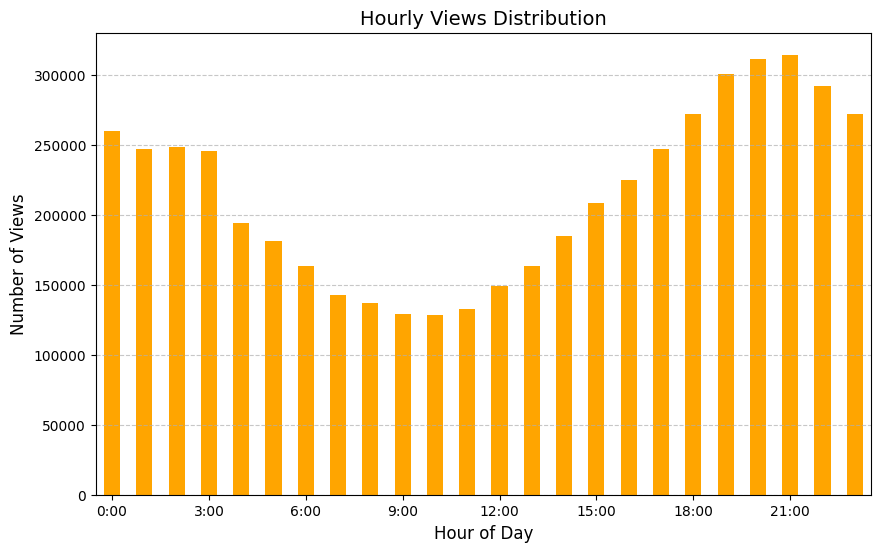

In [23]:
# 타임스탬프를 시간 단위로 변환
train_df['hour'] = pd.to_datetime(train_df['time'], unit='s').dt.hour

# 시간대별 시청 수 계산
hourly_views = train_df['hour'].value_counts().sort_index()

# 막대 플롯으로 시각화
plt.figure(figsize=(10, 6))
hourly_views.plot(kind='bar', color='orange', rot=0)
plt.title('Hourly Views Distribution', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 24, 3), labels=[f"{hour}:00" for hour in range(0, 24, 3)])
plt.show()

In [24]:
item_popularity = train_df['item'].value_counts()
print(item_popularity.head(10))  # 상위 10개 인기 아이템

item
2571    19699
2959    18437
296     18202
318     18168
356     17339
4993    17237
7153    16656
5952    16387
593     15847
2858    15213
Name: count, dtype: int64


In [25]:
title_df

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [26]:
top10_item = item_popularity.index[:10]
for t in top10_item:
    print(title_df[title_df['item'] == t].values)

[[2571 'Matrix, The (1999)']]
[[2959 'Fight Club (1999)']]
[[296 'Pulp Fiction (1994)']]
[[318 'Shawshank Redemption, The (1994)']]
[[356 'Forrest Gump (1994)']]
[[4993 'Lord of the Rings: The Fellowship of the Ring, The (2001)']]
[[7153 'Lord of the Rings: The Return of the King, The (2003)']]
[[5952 'Lord of the Rings: The Two Towers, The (2002)']]
[[593 'Silence of the Lambs, The (1991)']]
[[2858 'American Beauty (1999)']]


In [29]:
overlapping_users_by_item = train_df.groupby('item')['user'].apply(list)
print(overlapping_users_by_item)


item
1         [11, 14, 58, 82, 90, 96, 99, 124, 129, 133, 13...
2         [232, 294, 370, 409, 440, 462, 466, 482, 520, ...
3         [96, 271, 427, 486, 492, 572, 775, 777, 872, 9...
4         [2242, 2709, 3708, 3948, 6318, 10303, 17127, 2...
5         [206, 572, 578, 619, 741, 872, 1068, 1163, 125...
                                ...                        
118700    [1734, 10303, 23841, 25992, 30250, 31181, 3308...
118900    [614, 3289, 8582, 8963, 9690, 10303, 11406, 16...
118997    [1644, 2423, 3020, 3289, 4222, 6390, 11232, 14...
119141    [979, 6390, 6915, 8287, 9919, 10616, 11679, 11...
119145    [828, 1339, 2544, 4222, 4967, 10514, 12461, 15...
Name: user, Length: 6807, dtype: object


In [32]:
len(overlapping_users_by_item[1])

12217